<a href="https://colab.research.google.com/github/DiegoPuentes/MachineLearning/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Claves del dataset Iris: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Nombres de las características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Nombres de las clases: ['setosa' 'versicolor' 'virginica']

Descripción del dataset Iris: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  

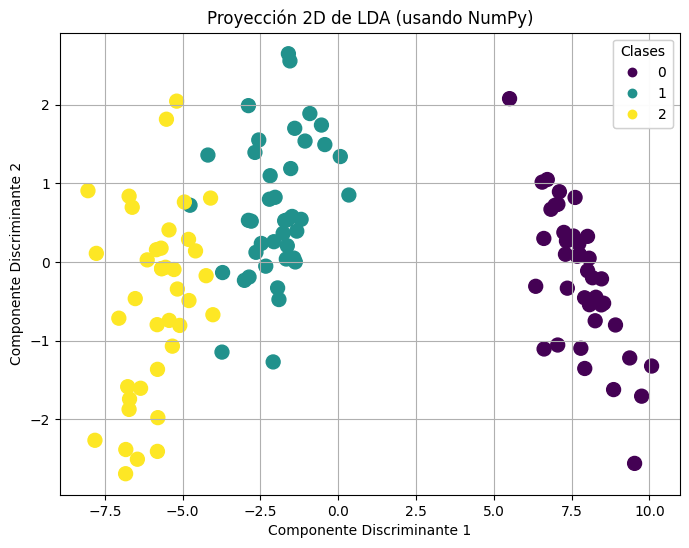

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Iris
iris = load_iris()
print("Claves del dataset Iris:", iris.keys())
print("Nombres de las características:", iris.feature_names)
print("\nNombres de las clases:", iris.target_names)
print("\nDescripción del dataset Iris:", iris.DESCR + "\n")

X = iris.data  # Características (4)
y = iris.target  # Etiquetas (clase de flor)

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear el modelo LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)

# Entrenar el modelo con los datos de entrenamiento
lda.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = lda.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación (Precisión, Recall, F1-Score):")
print(classification_report(y_test, y_pred))

print("Precisión del Modelo:")
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

y_train_np = np.array(y_train)

# Crear gráfico 2D usando matplotlib
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_np, cmap='viridis', s=100)

# Añadir etiquetas y leyenda
plt.title('Proyección 2D de LDA (usando NumPy)')
plt.xlabel('Componente Discriminante 1')
plt.ylabel('Componente Discriminante 2')

# Crear una leyenda a partir del gráfico scatter
legend1 = plt.legend(*scatter.legend_elements(), title="Clases")
plt.gca().add_artist(legend1)

plt.grid(True)
plt.show()
